In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pip install seaborn
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_csv('ecommerce_sales_34500.csv')
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,23/12/2023,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,03/04/2025,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,08/10/2024,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,14/09/2024,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,21/12/2024,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,13/08/2025,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,04/12/2023,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,01/02/2025,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,27/03/2024,6,East,No,21.94,5.61,0.53,27,Female


# 1. DATA OVERVIEW AND BASIC INFO

In [ ]:
df.shape

(34500, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [ ]:
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,23/12/2023,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,03/04/2025,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,08/10/2024,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,14/09/2024,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,21/12/2024,6,East,No,13.88,2.74,1.15,39,Male


# 2. DATA QUALITY CHECK

In [ ]:
# Missing values analysis
df.isnull().sum()

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64

In [ ]:
df.isnull().mean() * 100

order_id              0.0
customer_id           0.0
product_id            0.0
category              0.0
price                 0.0
discount              0.0
quantity              0.0
payment_method        0.0
order_date            0.0
delivery_time_days    0.0
region                0.0
returned              0.0
total_amount          0.0
shipping_cost         0.0
profit_margin         0.0
customer_age          0.0
customer_gender       0.0
dtype: float64

In [ ]:
# Duplicates check
df.duplicated().sum()

np.int64(0)

In [ ]:
# Data types verification
df.dtypes

order_id               object
customer_id            object
product_id             object
category               object
price                 float64
discount              float64
quantity                int64
payment_method         object
order_date             object
delivery_time_days      int64
region                 object
returned               object
total_amount          float64
shipping_cost         float64
profit_margin         float64
customer_age            int64
customer_gender        object
dtype: object

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

<ipython-input-12-7e9866babf1b>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [ ]:
df.dtypes

order_id                      object
customer_id                   object
product_id                    object
category                      object
price                        float64
discount                     float64
quantity                       int64
payment_method                object
order_date            datetime64[ns]
delivery_time_days             int64
region                        object
returned                      object
total_amount                 float64
shipping_cost                float64
profit_margin                float64
customer_age                   int64
customer_gender               object
dtype: object

# 3. PHÂN TÍCH ĐƠN BIẾN

<Axes: xlabel='price', ylabel='Count'>

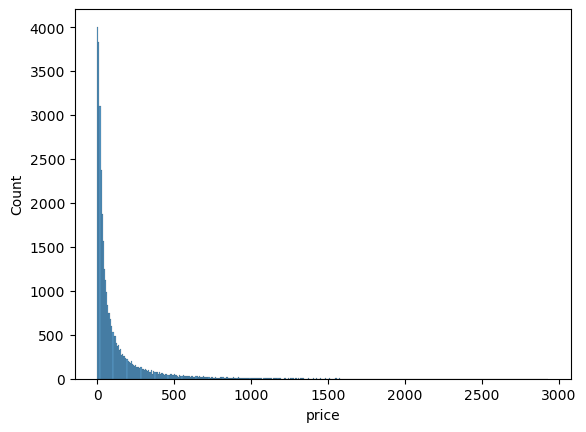

In [ ]:
# Biến số
# Biểu đồ phân phối các biến liên tục
sns.histplot(df['price'])

Biểu đồ này 📊 cho thấy phân phối của biến price (giá sản phẩm) — và nhìn vào hình, ta thấy:  
Hầu hết giá trị nằm rất thấp, sát về 0 (tập trung ở đáy).  
Một số giá trị rất cao (outlier) xuất hiện lẻ loi phía trên (những vòng tròn).  
➡️ Nghĩa là dữ liệu price rất lệch phải (right-skewed) — đa phần giá rẻ, vài sản phẩm giá cực cao.

<Axes: xlabel='total_amount', ylabel='Count'>

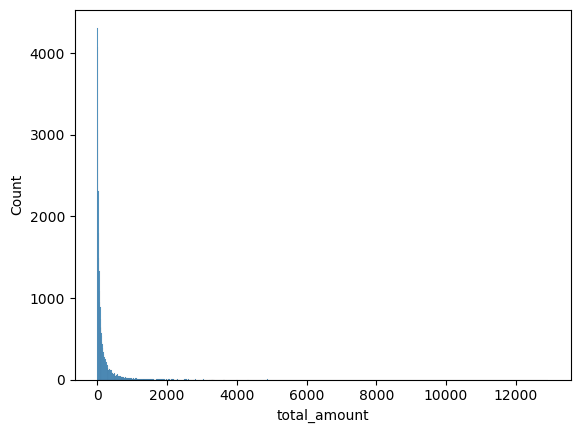

In [ ]:
sns.histplot(df['total_amount'])

Biểu đồ này cho thấy biến total_amount (tổng tiền đơn hàng) phân phối cực lệch phải:  
Phần lớn đơn hàng có giá trị rất nhỏ, tập trung sát 0.  
Một vài đơn hàng rất lớn (outlier) kéo đuôi biểu đồ dài về bên phải.  
👉 Nghĩa là:  
Khách thường mua đơn giá thấp.  
Chỉ có rất ít giao dịch giá trị cao (VIP / bulk order).

<Axes: xlabel='profit_margin', ylabel='Count'>

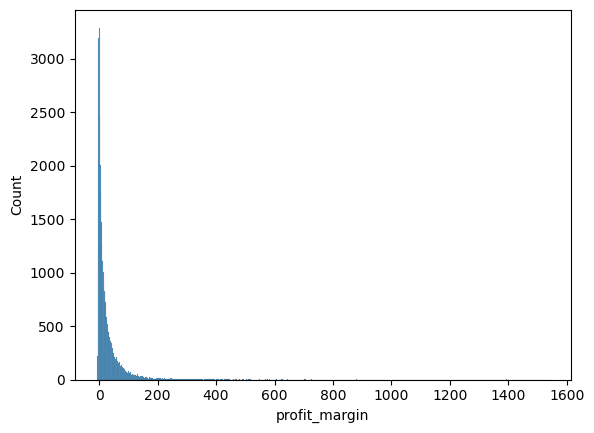

In [ ]:
sns.histplot(df['profit_margin'])

Biểu đồ này cho thấy biến profit_margin cũng rất lệch phải 📈  
Đa số đơn hàng có lợi nhuận nhỏ, tập trung quanh 0–50.  
Một vài đơn hàng có lợi nhuận cực cao (outlier) kéo đuôi dài về phải.  
👉 Nghĩa là phần lớn sản phẩm mang lại lợi nhuận thấp, chỉ ít giao dịch đặc biệt sinh lợi lớn.

<Axes: xlabel='customer_age', ylabel='Count'>

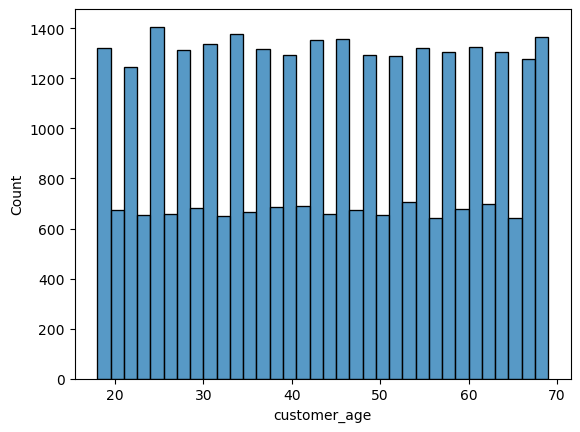

In [ ]:
sns.histplot(df['customer_age'])

Biểu đồ này cho thấy biến customer_age có phân phối khá đồng đều 🧍‍♂️📊  
Các cột (độ tuổi 18–70) cao gần bằng nhau → số khách ở mỗi nhóm tuổi xấp xỉ nhau.  
Không có nhóm tuổi nào nổi trội hay thiếu dữ liệu.  
👉 Nghĩa là dataset được phân bổ tuổi cân bằng, không lệch về giới trẻ hay người lớn tuổi.  
    
Những cột thấp xen giữa các cột cao nghĩa là:  
➡️ Ở một vài độ tuổi nhất định, số lượng khách hàng ít hơn hẳn so với xung quanh.

<Axes: ylabel='price'>

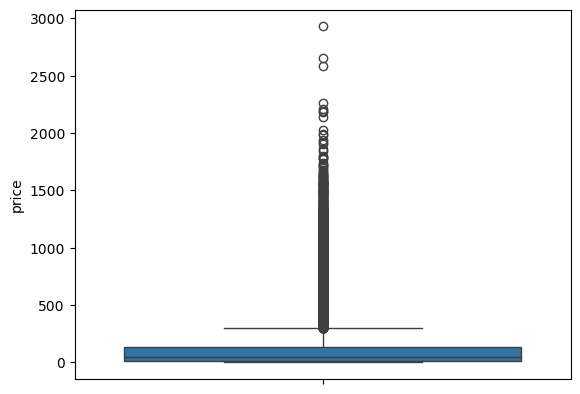

In [ ]:
# Biểu đồ hộp để phát hiện outlier
sns.boxplot(df['price'])

Qua biểu đồ cho thấy phần lớn giá cả nằm trong khoảng từ 500 - 1500, số ít từ 1500-2000.
Còn lại các giá trị từ 2000 đổ lên có thể là outlier
Hộp xanh = khoảng dữ liệu chính (từ Q1 đến Q3 — 50% giữa).

Đường giữa hộp = trung vị (median).
Râu (whiskers) = phạm vi dữ liệu “bình thường”.
Các chấm tròn phía trên = outliers — giá sản phẩm cao bất thường.
👉 Nghĩa là: Phần lớn giá sản phẩm tập trung ở mức thấp, nhưng có nhiều giá trị rất cao vượt xa phần còn lại → nhiều outlier ở phía trên.

<Axes: ylabel='total_amount'>

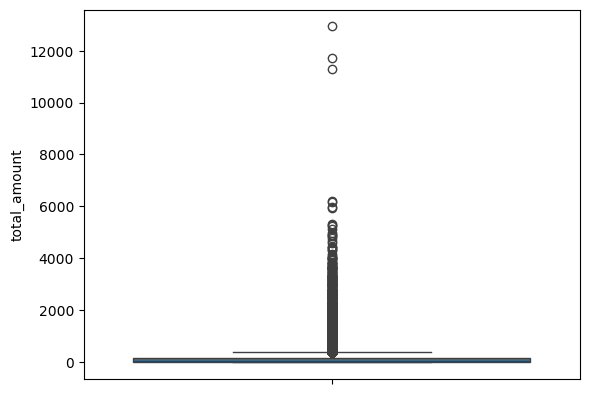

In [ ]:
sns.boxplot(df['total_amount'])

Tương tự, hầu hết đơn hàng có giá trị nhỏ, nhưng một số đơn hàng đặc biệt cao

<Axes: xlabel='category'>

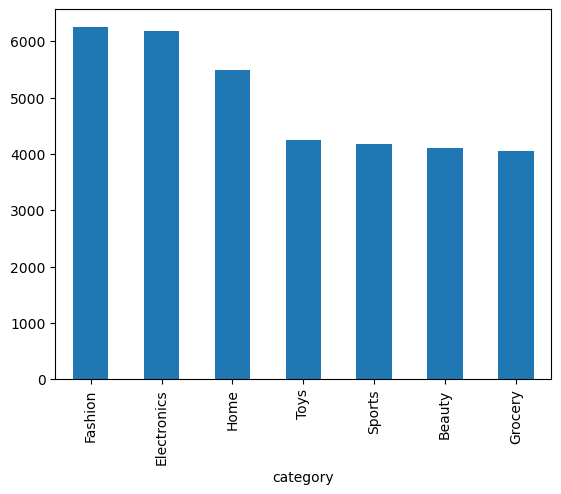

In [ ]:
# Biến phân loại
df['category'].value_counts().plot(kind='bar')

Hạng mục được mua nhiều nhất là thời trang (quần áo) và đồ điện tử rồi đến đồ gia dụng/nội thất. Còn lại các hạng mục đồ chơi, đồ thể thao, làm đẹp và thực phẩm sàn sàn nhau  
--> cho thấy khách hàng tập trung mua nhiều ở thời trang và điện tử trong khi các ngành hàng khác kém phổ biến hơn

<Axes: xlabel='region'>

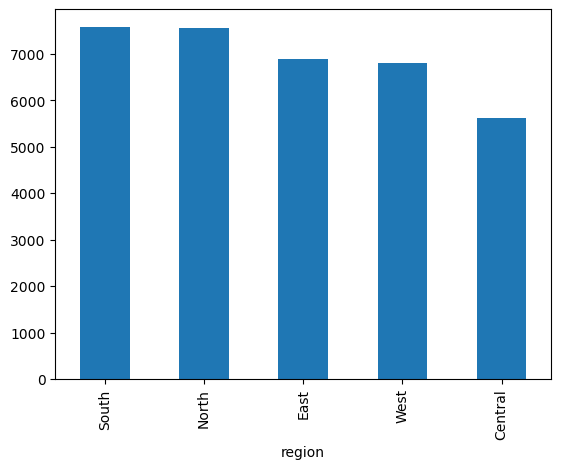

In [ ]:
df['region'].value_counts().plot(kind='bar')

Khu vực mua hàng nhiều nhất là South và North, thứ 2 là East và West đồng đều. Vùng trung tâm sức mua kém nhất

<Axes: xlabel='payment_method'>

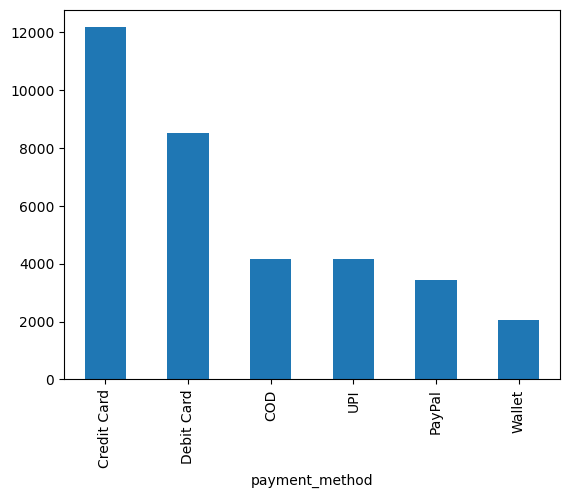

In [ ]:
df['payment_method'].value_counts().plot(kind='bar')

Khách hàng chủ yếu thanh toán bằng thẻ tín dụng hoặc thẻ ghi nợ, cho thấy nhóm người dùng có xu hướng ưu tiên thanh toán online hiện đại hơn tiền mặt.  
→ Đây là insight hữu ích nếu bạn muốn phân tích hành vi thanh toán hoặc tối ưu kênh thu tiền.

<Axes: xlabel='customer_gender'>

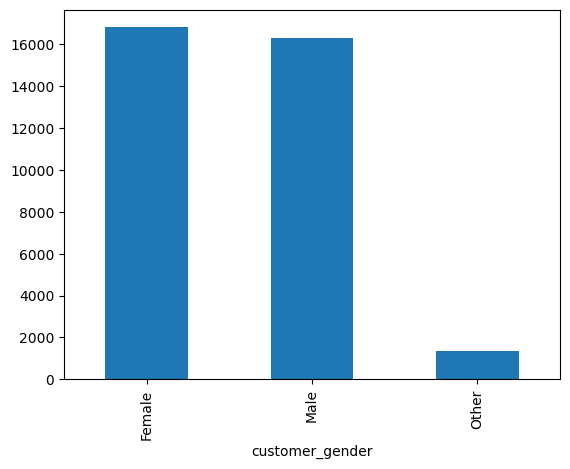

In [ ]:
df['customer_gender'].value_counts().plot(kind='bar')

Giải thích nhanh:  
- Female (nữ) và Male (nam) gần như cân bằng nhau — số lượng khách hàng hai giới tương đương.  
- Other chiếm tỷ lệ rất nhỏ.

Kết luận:  
Dữ liệu khách hàng có sự cân bằng giới tính, nghĩa là sản phẩm/dịch vụ có thể thu hút cả hai giới tương đương, không thiên lệch mạnh.  
Nếu phân tích sâu hơn, có thể kiểm tra xem giới tính nào chi tiêu cao hơn hoặc mua loại hàng nào nhiều hơn.

<Axes: xlabel='returned'>

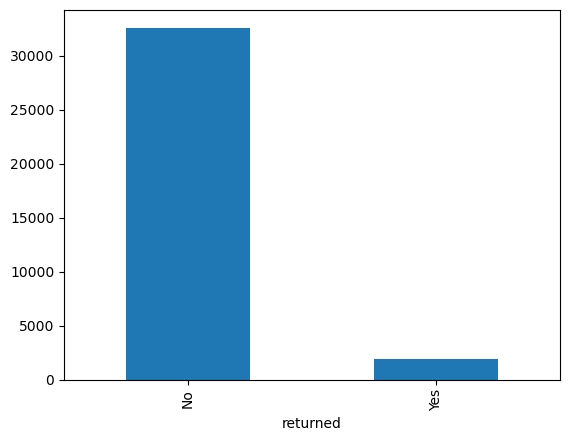

In [ ]:
df['returned'].value_counts().plot(kind='bar')

- No chiếm áp đảo → đa số đơn hàng không bị trả lại.
- Yes rất ít → chỉ một phần nhỏ đơn bị hoàn trả.

👉 Kết luận:  
Hệ thống vận hành ổn định, tỷ lệ hoàn trả thấp → khách hàng có mức hài lòng cao hoặc chất lượng sản phẩm ổn định.

# 4. PHÂN TÍCH DÒNG THỜI GIAN

<Axes: xlabel='order_date'>

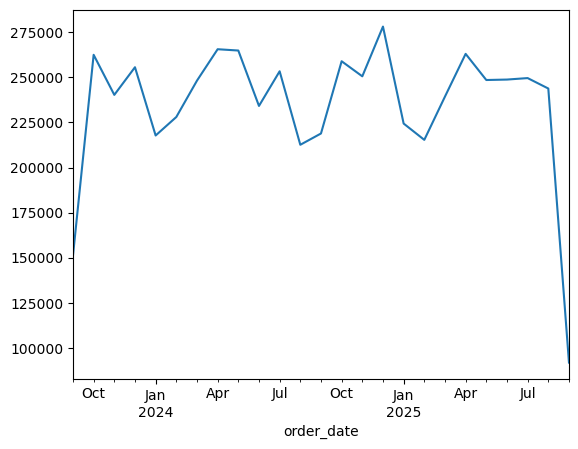

In [ ]:
# Xu hướng doanh thu hàng tháng
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()
monthly_sales.plot()

- Mỗi điểm trên trục X = 1 tháng (dựa trên order_date).
- Trục Y = tổng doanh thu (total_amount) trong tháng đó.
- Nhìn chung, doanh thu dao động quanh 220k–270k, có những tháng tăng vọt (cao điểm mua sắm trong các tháng 4, 7, 10-12).
- Phần giảm mạnh ở cuối (tháng gần nhất) có thể do:
  - Dữ liệu tháng đó chưa đầy đủ (vì chưa hết tháng),
  - Hoặc có sự sụt giảm thật (ví dụ sau khuyến mãi lớn).
  
👉 Kết luận:  
Doanh thu ổn định, có tính chu kỳ nhẹ. Cần kiểm tra lại tháng cuối để biết là do thiếu dữ liệu hay doanh thu giảm thật.

<Axes: xlabel='order_date'>

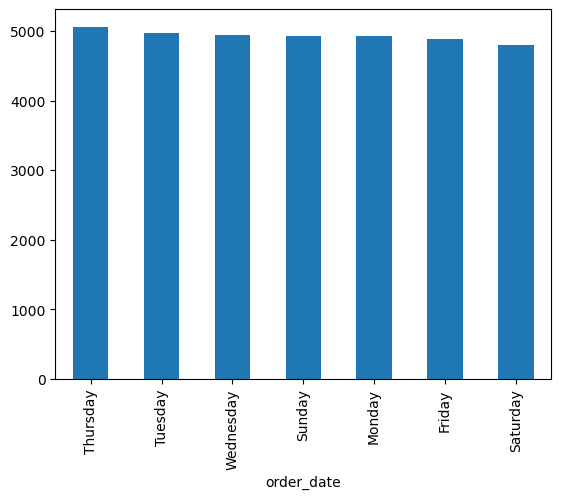

In [ ]:
# Xu hướng bán hàng hàng ngày
df['order_date'].dt.day_name().value_counts().plot(kind='bar')

- Các cột khá đồng đều, nghĩa là hoạt động bán hàng ổn định suốt cả tuần.
- Không có ngày nào nổi bật hẳn, tuy nhiên Thursday có vẻ cao nhất một chút, Saturday thấp hơn nhẹ.

👉 Kết luận:  
Doanh nghiệp có lưu lượng bán đều, không phụ thuộc nhiều vào cuối tuần.  
Nếu muốn tối ưu, có thể:  
Chạy thêm khuyến mãi cuối tuần để tăng đơn.  
Phân tích theo loại sản phẩm từng ngày để xem nhóm hàng nào “hot” vào ngày cụ thể.

# 5. PHÂN TÍCH ĐA BIẾN

### PHÂN TÍCH THEO DANH MỤC

<Axes: xlabel='category', ylabel='total_amount'>

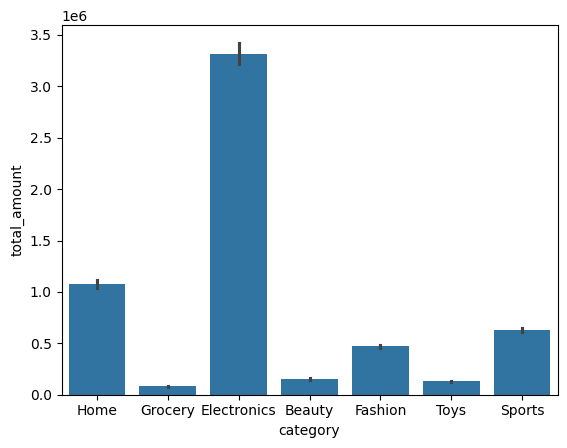

In [ ]:
# Doanh thu theo từng hạng mục
sns.barplot(x='category', y='total_amount', data=df, estimator=sum)

Xét doanh thu theo từng hạng mục, hàng Điện tử chiếm doanh thu vượt trội  
Sau đó đến Đồ gia dụng/nội thất và Sport có doanh thu khá tốt.  
Grocery, Beauty và Toys đóng góp nhỏ  
--> doanh thu chủ yếu đến từ nhóm Electronics, là nhóm hàng chiến lược.  
Nên:  
- Duy trì đầu tư marketing cho nhóm này
- Cân nhắc chiến dịch tăng doanh thu co các nhóm yếu

<Axes: xlabel='category', ylabel='profit_margin'>

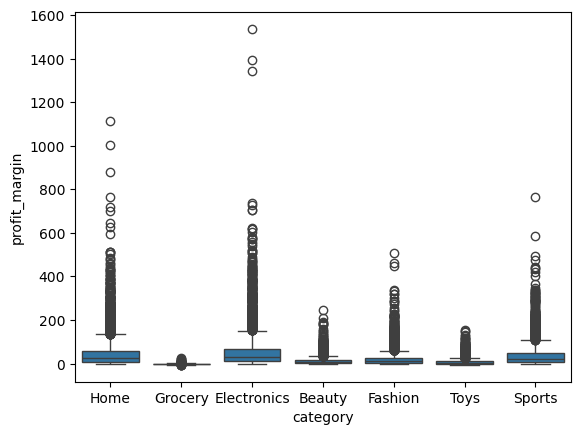

In [ ]:
# Lợi nhuận biên theo từng hạng mục
sns.boxplot(x='category', y='profit_margin', data=df)

- Electronic và Home có median lợi nhuận cao hơn so với các nhóm khác --> sinh lời tốt
- Grocery có biên lơi nhuận rất thấp
- Tất cả các nhóm đều có outliers lớn, có thấy có vài sản phẩm siêu lợi nhuận

--> ngành Electronic và Home là 2 nhóm mang lại lợi nhuận ổn định và cao nhất. Mặc dù Fashion là ngành hàng được mua nhiều nhất nhưng lợi nhuận lại không bằng

<Axes: xlabel='category', ylabel='returned'>

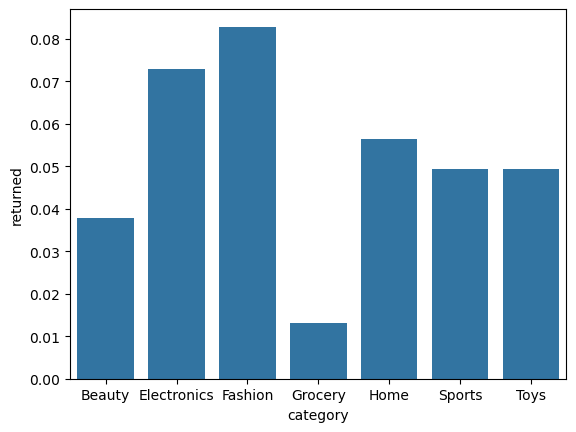

In [ ]:
# Tỉ lệ hoàn trả theo danh mục
return_rates = df.groupby('category')['returned'].apply(lambda x: (x== 'Yes').mean())
sns.barplot(return_rates)

Giải thích nhanh:  
- Trục X: các loại hàng.
- Trục Y: tỷ lệ % đơn hàng bị hoàn trả.
- Mỗi cột = tỷ lệ trung bình số đơn có returned = 'Yes' trong từng nhóm.

Nhận xét chính:  
- Fashion có tỷ lệ hoàn trả cao nhất (~8%) → có thể do size sai, không vừa ý hoặc xu hướng thay đổi nhanh.
- Electronics cũng khá cao (~7%) → có thể do hỏng hóc, lỗi kỹ thuật.
- Grocery thấp nhất (~1%) → hợp lý vì hàng tiêu dùng nhanh, ít hoàn trả.
- Các nhóm khác (Home, Sports, Toys, Beauty) dao động quanh mức trung bình 4–5%.

👉 Kết luận:  
Fashion và Electronics cần được theo dõi kỹ quy trình bán & hậu mãi để giảm tỷ lệ hoàn hàng.  
Grocery hoạt động ổn định nhất, gần như không có rủi ro hoàn trả.

### PHÂN TÍCH THEO KHU VỰC

<Axes: xlabel='region', ylabel='total_amount'>

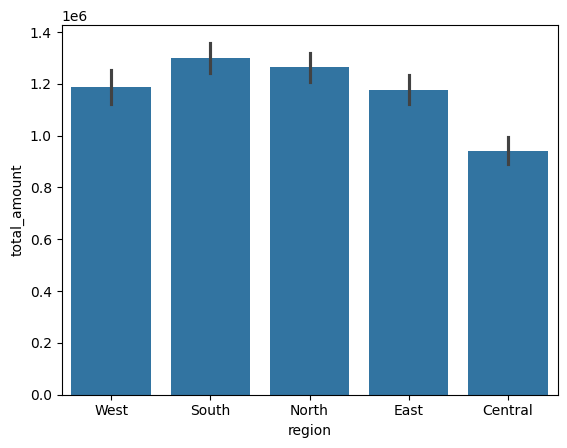

In [ ]:
# Phân phối doanh thu theo khu vực
sns.barplot(x='region', y='total_amount', data=df, estimator=sum)

Nhận xét:  
- South có doanh thu cao nhất (~1.3 triệu).
- North và West theo sau, cũng rất mạnh.
- East hơi thấp hơn chút (~1.18 triệu).
- Central thấp nhất (~0.95 triệu) → khu vực cần cải thiện.

👉 Kết luận:  
- Khu vực South là thị trường trọng điểm.
- Nên phân tích thêm xem yếu tố nào giúp South dẫn đầu (mật độ khách hàng, sản phẩm bán chạy, kênh thanh toán,...), và tìm chiến lược nâng doanh thu cho Central (ví dụ tăng quảng bá, mở thêm điểm bán hoặc tối ưu logistics).

In [ ]:
# So sánh hiệu suất bán hàng các khu vực với nhau
df.groupby('region')[['total_amount', 'profit_margin']].mean()

,total_amount,profit_margin
region,,
Central,166.992788,28.058184
East,170.384523,28.249600
North,166.931900,27.534810
South,171.162456,27.832433
West,174.258299,28.993204


In [ ]:
import matplotlib.pyplot as plt

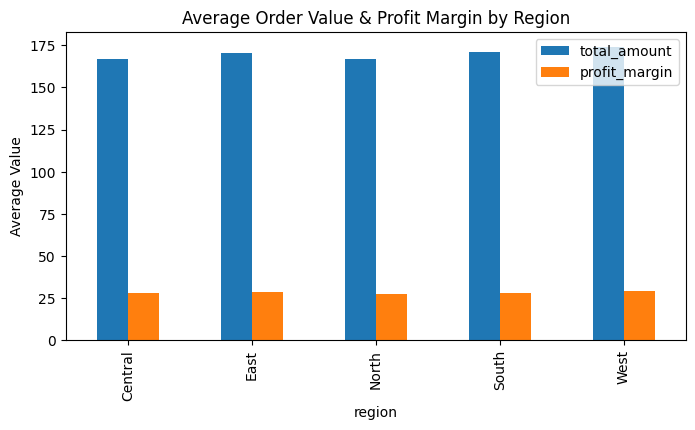

In [ ]:
df.groupby('region')[['total_amount','profit_margin']].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Order Value & Profit Margin by Region")
plt.ylabel("Average Value")
plt.show()

📌 Kết luận nhanh:  
- West có:
  - Giá trị đơn hàng trung bình cao nhất
  - Lợi nhuận biên cao nhất
👉 Khu vực hiệu quả nhất.
- Central & North thấp nhất ở cả hai chỉ số
👉 Khu vực cần cải thiện (marketing, khuyến mãi, logistics, sản phẩm phù hợp hơn)
Các vùng nhìn chung không chênh lệch quá lớn, nhưng West nổi bật, còn Central & North yếu hơn.

🎯 Insight hành động:  
- Tập trung mở rộng và tái đầu tư khu vực West
- Tìm nguyên nhân hiệu suất thấp tại Central & North (ship xa hơn? mức chi tiêu dân cư thấp? tồn kho? ít sản phẩm chủ lực?)

### PHÂN TÍCH PHƯƠNG THỨC THANH TOÁN

In [ ]:
# Xu hướng chọn phương thức thanh toán theo khu vực/hạng mục
pd.crosstab(df['payment_method'], df['category'])

category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
payment_method,,,,,,,
COD,500,753,713,514,667,501,512
Credit Card,1390,2174,2283,1398,1923,1498,1504
Debit Card,1055,1502,1529,984,1366,1019,1050
PayPal,420,624,614,424,559,387,416
UPI,507,765,735,489,638,508,514
Wallet,231,362,380,249,334,258,251


<Axes: xlabel='category', ylabel='payment_method'>

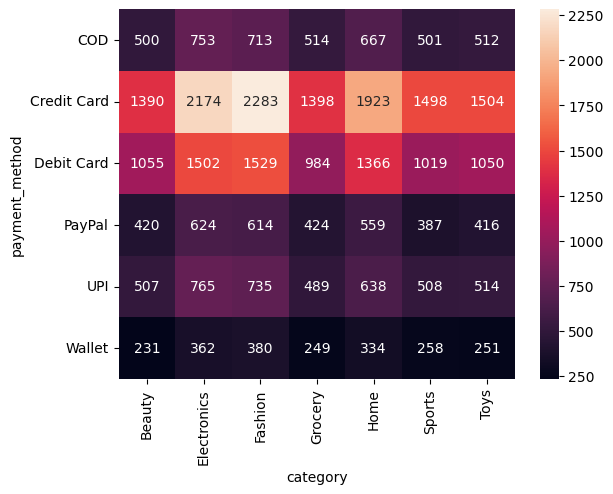

In [ ]:
sns.heatmap(pd.crosstab(df['payment_method'], df['category']), annot=True, fmt='d')

Trả lời câu hỏi: Khách dùng phương thức thanh toán nào để mua từng loại sản phẩm?  
- Credit card chiếm ưu thế mạnh nhất ở tất cả các hạng mục --> khách hàng mua hàng giá trị cao và có tín dụng tốt
- Debit card cũng phổ biến, đứng thứ 2 mọi danh mục --> tệp khách đại trà, mua ổn định
- Electronic và Fashion có lượt thanh toán cao nhất, phù hợp vì đây là các ngành tiêu dụng mạnh và nhiều giao dịch online
- Wallet và Paypal thấp, khách hàng ít dùng ví điện tử --> có thể do thói quen thị trường chưa phát triển mạnh hoặc phí/ưu đãi thấp
- Grocery có tỉ lệ COD cao hơn tương đối, phù hợp với hành vi người dùng nhu yếu phẩm, thích nhận hàng rồi mới trả tiền

In [ ]:
pd.crosstab(df['payment_method'], df['region'])

region,Central,East,North,South,West
payment_method,,,,,
COD,683,829,923,901,824
Credit Card,1942,2518,2608,2701,2401
Debit Card,1430,1657,1886,1892,1640
PayPal,555,646,779,768,696
UPI,682,830,952,866,826
Wallet,340,424,424,456,421


<Axes: xlabel='region', ylabel='payment_method'>

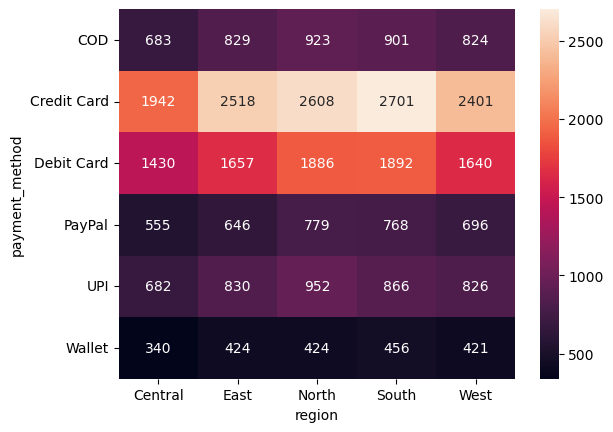

In [ ]:
sns.heatmap(pd.crosstab(df['payment_method'], df['region']), annot=True, fmt='d')

Trả lời câu hỏi: Khách hàng ở khu vực nào thích thanh toán bằng phương thức gì?  
- Credit card đứng đầu mọi khu vực --> khác hàng có mức chi tiêu cao, tín dụng tốt
- Debit card cũng mạnh ở tất cả khu vực --> kênh thanh toán phổ thông, dễ tiếp cận
- North và South có lượng giao dịch cao nhất --> 2 khu vực có khách hàng hoạt động mạnh nhất
- COD khá cao ở Central và East, thói quen trả tiền khi nhận hàng còn phổ biến
- UPI/Wallet thấp --> ví điện tử và chuyển khoản nhanh chưa được sử dụng rộng rãi

# 6. PHÂN TÍCH NHÂN KHẨU HỌC KHÁCH HÀNG

<Axes: xlabel='customer_age', ylabel='Density'>

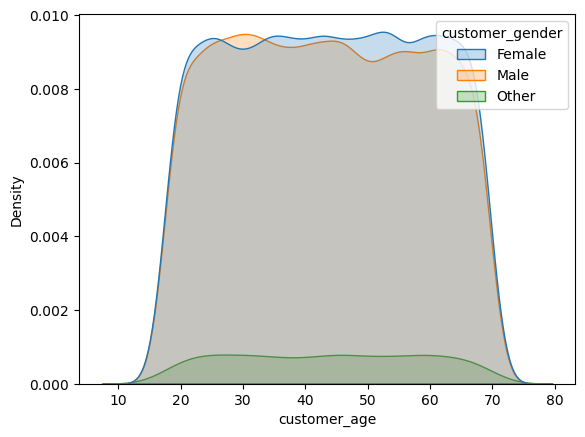

In [ ]:
# Phân bổ độ tuổi theo giới tính
sns.kdeplot(data=df, x='customer_age', hue='customer_gender', fill=True)

Ba giới (Female, Male, Other) có phân bố tuổi khá giống nhau:  
- Median khoảng ~43–45 tuổi
- Dải tuổi từ ~18 đến ~70
- Không có nhóm nào lệch tuổi rõ rệt

=> Độ tuổi khách hàng phân bố tương đối đồng đều, chủ yếu 25–60 tuổi  
=> Không có khác biệt đáng kể về phân phối tuổi giữa các giới tính  
=> Nhóm "Other" chiếm tỷ lệ rất nhỏ

<Axes: xlabel='age_group', ylabel='total_amount'>

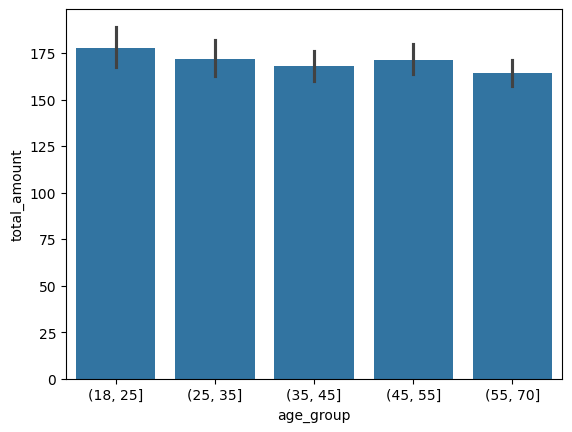

In [ ]:
# Mô hình chi tiêu theo nhóm tuổi
df['age_group'] = pd.cut(df['customer_age'], bins=[18, 25, 35, 45, 55, 70])
sns.barplot(x='age_group', y='total_amount', data=df)

Giữa các nhóm tuổi:  
- Nhóm 18-25 chi tiêu nhiều nhất
- Chi tiêu giảm dần khi tuổi tăng -> nhóm lớn tuổi chi tiêu ít hơn
- Tuy nhiên chênh lệch giữa các nhóm không quá lớn (khoảng 160-180)

# 7. PHÂN TÍCH SẢN PHẨM VÀ GIÁ CẢ

<Axes: xlabel='price', ylabel='discount'>

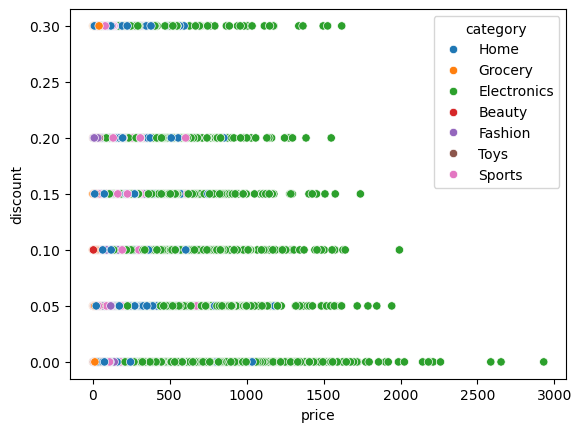

In [ ]:
# Mối quan hệ giữa giá và discount
sns.scatterplot(x='price', y='discount', data=df, hue='category')

Nhìn thấy điều gì?  
- Discount chỉ có vài mức cố định: 0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 → Đây là chính sách chiết khấu dạng bậc (tier discount), không phải random.
- Phần lớn điểm tập trung ở giá thấp (< 1000)
- Riêng Electronics (màu xanh lá) có nhiều sản phẩm giá cao lên đến ~3000
- Các sản phẩm giá cao vẫn có thể được giảm giá ở nhiều mức → high-value items vẫn hay được giảm (đặc biệt electronics)
- Không thấy mối quan hệ tuyến tính rõ ràng giữa price và discount → giá cao không đồng nghĩa với discount cao hay thấp

Insight rút ra  
- Chiết khấu theo chương trình, không theo giá sản phẩm
- Electronics là nhóm nổi bật về giá trị cao, đa dạng mức giảm giá → chiến lược giảm giá mạnh để kích cầu cho hàng giá trị lớn
- Các ngành khác chủ yếu giá thấp và giảm giá ở mức nhẹ

In [ ]:
# Phân tích số lượng
df['quantity'].value_counts()

quantity
1    24837
2     5138
3     2455
4     1398
5      672
Name: count, dtype: int64

<Axes: xlabel='quantity', ylabel='count'>

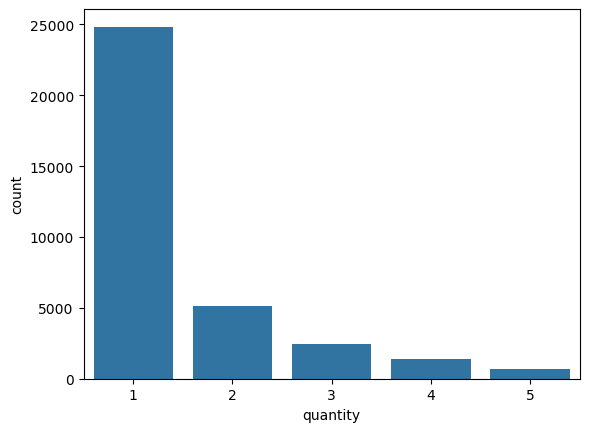

In [ ]:
sns.countplot(x='quantity', data=df[df['quantity'] <= 10])

Đa số đơn hàng (~25k đơn) chỉ mua 1 sản phẩm, những đơn 2-5 sản phẩm chiếm ít hơn.  
--> Hành vi mua sắm chủ yếu là mua đơn lẻ, không phải giỏ hàng lớn. Khách mua theo nhu cầu từng nhóm, không gom nhiều sản phẩm trong một giao dịch

<Axes: xlabel='region', ylabel='shipping_cost'>

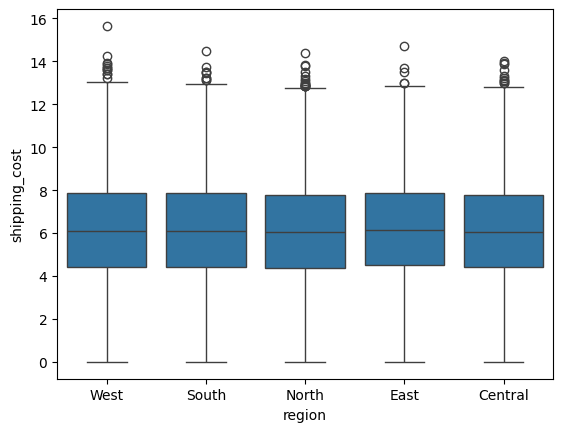

In [ ]:
# Phân tích giá giao hàng
sns.boxplot(x='region', y='shipping_cost', data=df)

- Chi phí giao hàng giữa các khu vực gần như tương đương nhau
- Median của các vùng đều khoảng ~6
- Có một số outliers cụ thể (shipping cost rất cao) ở tất cả các vùng, nhưng không tập trung ở vùng nào cụ thể --> không có vùng nào ship đắt bất thường mà có thể do khối lượng/giá trị sản phẩm

# 8. PHÂN TÍCH LỢI NHUẬN

<Axes: xlabel='profit_margin', ylabel='Count'>

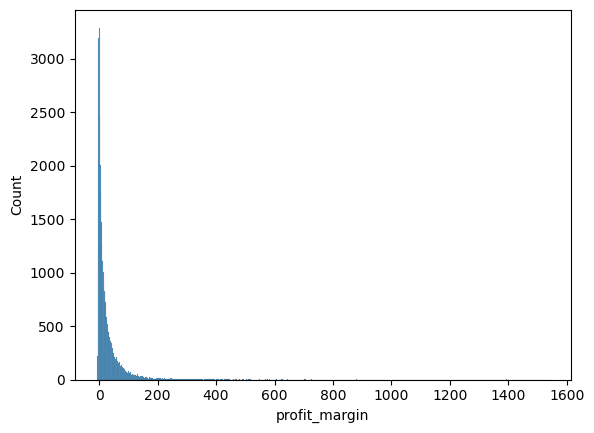

In [ ]:
# Phân bổ lợi nhuận biên
sns.histplot(df['profit_margin'])

- Đa số giá trị gần 0 → lợi nhuận rất thấp với phần lớn đơn hàng.
- Có đuôi phải dài (right-skewed) → một số ít đơn hàng có lợi nhuận cực cao (outliers).
- Điều này phản ánh mô hình thương mại: bán số lượng nhiều với margin nhỏ + vài sản phẩm margin lớn.

In [ ]:
# Phân tích lợi nhuận âm
negative_profits = df[df['profit_margin'] < 0]
negative_profits['category'].value_counts()

category
Grocery        3875
Toys            893
Fashion         511
Beauty          478
Home            172
Sports          105
Electronics      70
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

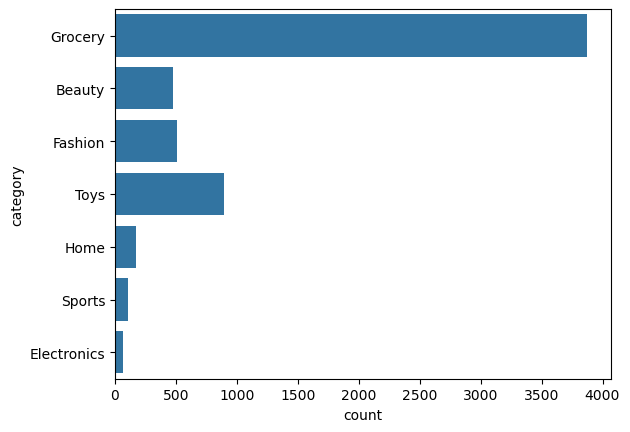

In [ ]:
sns.countplot(negative_profits['category'])

Danh mục bị lỗ (profit_margin < 0), **Grocery** lỗ nhiều nhất  
- Thường lợi nhuận thực phẩm thấp, biến động gia cao nên dễ âm
- Electronic gần như không lỗ --> kiểm soát giá tốt
- Fashion và Beauty cũng xuất hiện lỗ đáng kể --> có thể do chiến dịch giảm giá/marketing

? suy đoán có thể lỗ do phí ship cao hoặc discount chưa đủ hấp dẫn  
--> có thể tìm hiểu xem discount của 2 hạng mục này cao hay thấp? có đủ hấp dẫn không

In [ ]:
negative_profits.groupby('category')[['discount','shipping_cost']].mean()

,discount,shipping_cost
category,,
Beauty,0.056485,3.542490
Electronics,0.077143,7.196429
Fashion,0.060665,3.967671
Grocery,0.049213,3.848679
Home,0.068605,4.812442
Sports,0.077143,4.791143
Toys,0.054479,3.341646


- Electronics: đơn lỗ chủ yếu vì giảm giá lớn + phí ship cao → chính sách giảm giá & vận chuyển cần kiểm soát.
- Grocery: discount & shipping thấp nhưng vẫn lỗ nhiều → biên lợi nhuận gốc thấp, có thể do:
  - Giá vốn cao
  - Hàng tươi khó dự trữ → lỗ do xử lý tồn kho
  - Giá bán thấp → margin thấp, phí xử lý đơn hàng khiến lỗ

⚠️ Grocery không lỗ vì giảm giá, mà lỗ vì mô hình vận hành & margin ngành nhỏ.

In [ ]:
negative_profits.groupby('category')['profit_margin'].sum().sort_values().head(10)

category
Grocery       -9580.76
Toys           -893.20
Fashion        -487.92
Beauty         -430.27
Home           -149.20
Sports          -86.27
Electronics     -44.70
Name: profit_margin, dtype: float64

Grocery = thủ phạm chính ~ chiếm ~80% tổng lỗ → cần ưu tiên xử lý.  
✅ Review pricing  
✅ tối ưu logistics  
✅ SKU rationalization

<Axes: xlabel='count', ylabel='category'>

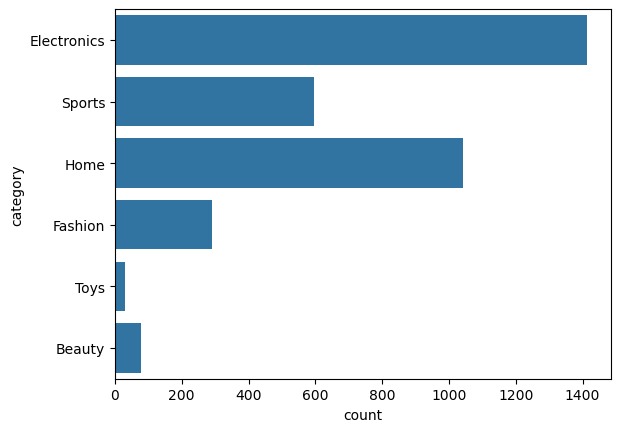

In [ ]:
#Những sản phẩm có lợi nhuận cao
high_profit = df[df['profit_margin'] > df['profit_margin'].quantile(0.9)]
sns.countplot(high_profit['category'])

Biểu đồ đang thể hiện những đơn hàng thuộc nhóm top 10% lợi nhuận cao nhất (quantile 0.9):  
- Electronic chiếm số lượng lớn nhất trong nhóm lợi nhuận cao --> siêu lợi nhuận
- Home đứng thứ 2 --> sản phẩm đồ gia dụng cũng mang lợi nhuận tốt
- Sports đứng thứ 3 --> biên lợi nhuận khá tốt
- Fashion lợi nhuận cao nhưng số lượng ít hơn
- Beauty, Toys gần như không có đơn lợi nhuận cao --> biên lợi nhuận thấp

✅ Insight ngắn gọn  
- Electronics = cash cow → tập trung quảng bá, mở rộng SKU, upsell/cross-sell
- Home & Sports = high-profit segments cần đầu tư thêm
- Beauty & Toys = lợi nhuận thấp → có thể cần:
  - Rà soát giá vốn
  - Tối ưu chương trình giảm giá
  - Cải thiện quản lý logistics hoặc chọn SKU tốt hơn

🎯 Gợi ý chiến lược  
- Tăng ngân sách marketing cho Electronics + Home + Sports
- Tối ưu tồn kho và chi phí cho Grocery, Beauty, Toys
- Xem lại pricing strategy với các danh mục lợi nhuận thấp

# 9. PHÂN TÍCH TƯƠNG QUAN

<Axes: >

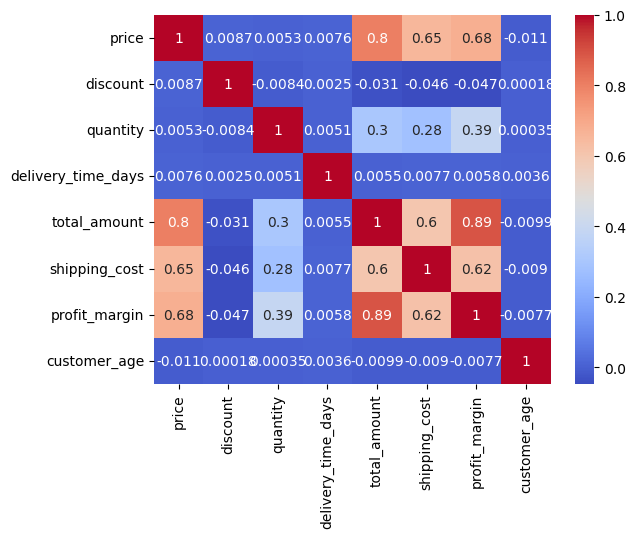

In [ ]:
# Ma trận tương quan
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Các mối tương quan chính cần kiểm tra:
# Giá vs total_amount
# Discount vs quantity
# shipping_cost vs total_amount

| Mối tương quan                    | Giá trị  | Ý nghĩa                                                                        |
| --------------------------------- | -------- | ------------------------------------------------------------------------------ |
| **price ↗ total_amount**          | **0.80** | Giá cao → tổng đơn hàng cao (dễ hiểu)                                          |
| **price ↗ profit_margin**         | **0.68** | Sản phẩm giá cao → lợi nhuận cao                                               |
| **total_amount ↗ profit_margin**  | **0.89** | Đơn hàng lớn thường đem lại lợi nhuận lớn                                      |
| **quantity ↗ total_amount**       | **0.30** | Tăng số lượng hơi tăng tổng tiền (*nhưng không mạnh như price*)                |
| **quantity ↗ profit_margin**      | **0.39** | Mua nhiều → lợi nhuận tăng nhẹ                                                 |
| **shipping_cost ↗ total_amount**  | **0.60** | Đơn giá trị lớn → phí ship cao (hàng cồng kềnh / bảo hiểm)                     |
| **shipping_cost ↗ profit_margin** | **0.62** | Lợi nhuận cao thường đi kèm phí vận chuyển cao (Electronics)                   |
| **discount**                      |          |                                                                                |
| ~0 với hầu hết                    | gần 0    | Discount **không ảnh hưởng nhiều** đến doanh thu/lợi nhuận → giảm giá vừa phải |

- Giá sản phẩm là yếu tố quyết định chính đến doanh thu & lợi nhuận.
- Các deal giá trị cao thường mang lại biên lợi nhuận cao & phí vận chuyển cao (Electronics).
- Discount không ảnh hưởng đáng kể → chính sách giảm giá hiện tại ổn và không phá lợi nhuận.
- Nhân khẩu học (tuổi) không ảnh hưởng đến mức chi tiêu.

# 10. PHÂN TÍCH HOÀN TRẢ

In [ ]:
# Tỷ lệ hoàn trả tổng thể
return_rate = (df['returned'] == 'Yes').mean()
print(return_rate)

0.05515942028985507


✅ Tỷ lệ hoàn trả tổng thể  
Return rate chung toàn bộ đơn hàng: ~5.5%  
→ tức là mỗi 100 đơn thì có ~5–6 đơn bị hoàn trả

Text(0, 0.5, 'return_rate')

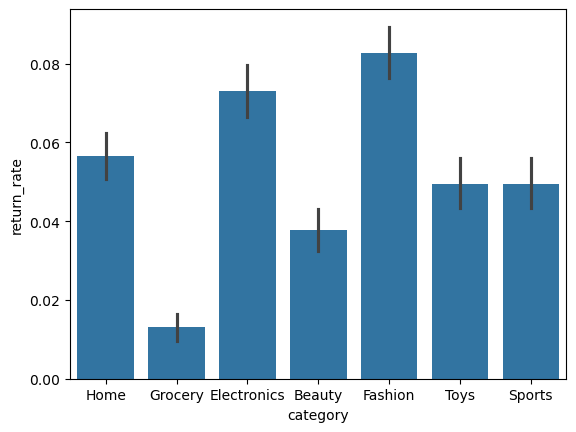

In [ ]:
df['returned_flag'] = (df['returned'] == 'Yes').astype(int)

sns.barplot(x='category', y='returned_flag', data=df, estimator=np.mean)
plt.ylabel('return_rate')

| Category          | Return Rate (approx)  | Nhận xét                                                               |
| ----------------- | --------------------- | ---------------------------------------------------------------------- |
| **Fashion**       | **~8% (cao nhất)**    | Quần áo dễ trả vì size/fit không đúng, chất lượng kỳ vọng khác thực tế |
| **Electronics**   | ~7.3%                 | Lỗi kỹ thuật, sản phẩm không đúng mô tả, đổi dòng/đời máy              |
| **Home**          | ~5.6%                 | Sản phẩm decor/kitchen có thể lỗi hoặc mismatch style                  |
| **Toys / Sports** | ~5%                   | Lỗi món nhỏ, trẻ con không thích, sai dụng cụ                          |
| **Beauty**        | ~3.8%                 | Thấp — mỹ phẩm thường không cho trả hoặc khách lựa chọn kỹ hơn         |
| **Grocery**       | **~1.2% (thấp nhất)** | Hàng FMCG ít trả, quy trình rõ ràng, giá trị nhỏ                       |

**Fashion & Electronics có tỷ lệ hoàn trả cao nhất**, chiếm ~15% tổng sản phẩm bị trả.  
Đây là hai nhóm sản phẩm dễ ảnh hưởng đến chi phí logistics & customer satisfaction.

# 11. HIỆU SUẤT GIAO HÀNG

<Axes: xlabel='delivery_time_days', ylabel='Count'>

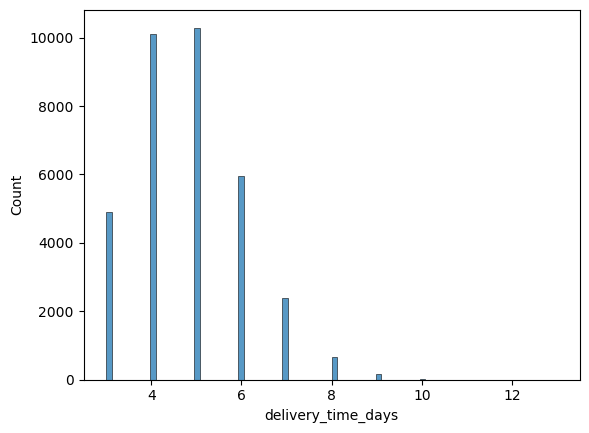

In [ ]:
# Phân tích thời gian giao hàng
sns.histplot(df['delivery_time_days'])

<Axes: xlabel='region', ylabel='delivery_time_days'>

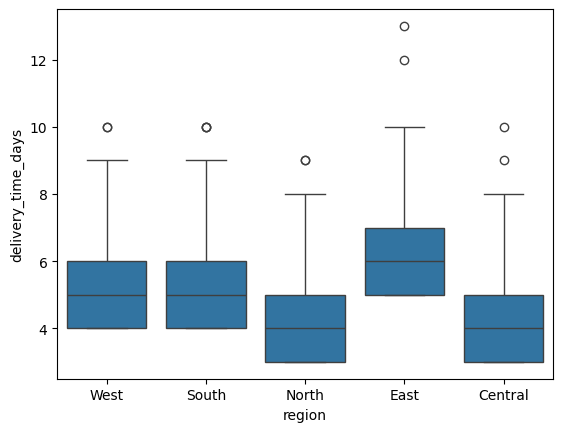

In [ ]:
# Thời gian giao hàng trên từng khu vực
sns.boxplot(x='region', y='delivery_time_days', data=df)

<Axes: xlabel='delivery_time_days'>

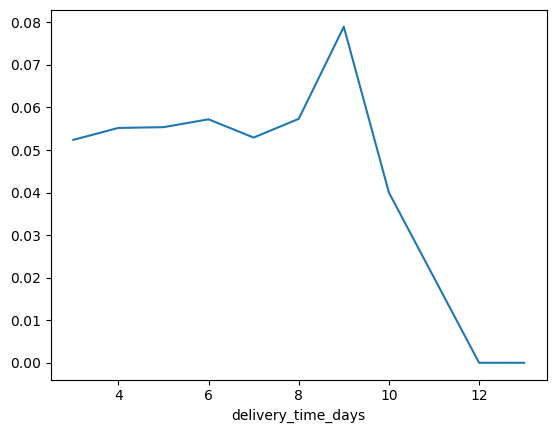

In [ ]:
# Mối quan hệ tương quan giữa thời gian giao hàng và tỉ lệ hoàn trả
df.groupby('delivery_time_days')['returned'].apply(lambda x: (x== 'Yes').mean()).plot()

Đa số đơn hàng mất khoảng 4-6 ngày để giao đến khách hàng, số ít đơn hàng bị giao quá 8 ngày.  
Với những đơn hàng đến khu vực East, thời gian giao trung bình sẽ lâu hơn (~6-7 ngày), North và Central giao nhanh nhất.  
Biểu đồ cho thấy  
| Delivery Time (days) | Tỷ lệ hoàn trả                            |
| -------------------- | ----------------------------------------- |
| 3 - 7 ngày           | ổn định ~5–6%                             |
| 8 - 9 ngày           | **cao bất thường ~8%**                    |
| ≥ 10 ngày            | giảm về gần 0% (ít dữ liệu, sample nhỏ)** |  

-> Các đơn giao trễ (8-9 ngày) có tỉ lệ hoàn trả tăng mạnh  

# 12. PHÁT HIỆN OUTLIER

In [ ]:
# Xác định outlier trong những chỉ số chủ chốt
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_amount'] < (Q1 - 1.5 * IQR)) | (df['total_amount'] > (Q3 + 1.5 * IQR))]

In [ ]:
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_amount'] >= Q1 - 1.5*IQR) & (df['total_amount'] <= Q3 + 1.5*IQR)]

# 13. TÍNH TOÁN CÁC CHỈ SỐ CHÍNH

In [ ]:
# Business metrics
total_revenue = df['total_amount'].sum()
avg_order_value = df['total_amount'].mean()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_profit_margin = df['profit_margin'].mean()

In [ ]:
metrics_df['Formatted'] = [
    f"${v:,.2f}" if i in ["Total Revenue","Avg Order Value"]
    else f"{v:.2%}" if i=="Avg Profit Margin"
    else f"{v:,}"
    for i,v in metrics_df['Value'].items()
]

print(metrics_df)


                          Value      Formatted
Total Revenue      5.865293e+06  $5,865,293.05
Avg Order Value    1.700085e+02        $170.01
Total Orders       3.450000e+04       34,500.0
Total Customers    7.903000e+03        7,903.0
Avg Profit Margin  2.811650e+01       2811.65%


In [ ]:
def business_metrics(df):
    return pd.DataFrame({
        "Total Revenue": [df['total_amount'].sum()],
        "Avg Order Value": [df['total_amount'].mean()],
        "Total Orders": [df['order_id'].nunique()],
        "Total Customers": [df['customer_id'].nunique()],
        "Avg Profit Margin": [df['profit_margin'].mean()]
    })

business_metrics(df)

,Total Revenue,Avg Order Value,Total Orders,Total Customers,Avg Profit Margin
0,5865293.05,170.008494,34500,7903,28.116505
